In [45]:
import numpy as np

In [2]:
open("usagov_bitly_data2013-05-17-1368832207").readline()

'{ "a": "Mozilla\\/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build\\/JZO54K) AppleWebKit\\/534.30 (KHTML, like Gecko) Version\\/4.0 Mobile Safari\\/534.30", "c": "US", "nk": 0, "tz": "America\\/Los_Angeles", "gr": "CA", "g": "15r91", "h": "10OBm3W", "l": "pontifier", "al": "en-US", "hh": "j.mp", "r": "direct", "u": "http:\\/\\/www.nsa.gov\\/", "t": 1368832205, "hc": 1365701422, "cy": "Anaheim", "ll": [ 33.816101, -117.979401 ] }\n'

In [4]:
import json
#record=[json.load(line) for line in open("usagov_bitly_data2013-05-17-1368832207")]

In [5]:
records=[json.loads(line) for line in open("usagov_bitly_data2013-05-17-1368832207")]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Los_Angeles',
 'gr': 'CA',
 'g': '15r91',
 'h': '10OBm3W',
 'l': 'pontifier',
 'al': 'en-US',
 'hh': 'j.mp',
 'r': 'direct',
 'u': 'http://www.nsa.gov/',
 't': 1368832205,
 'hc': 1365701422,
 'cy': 'Anaheim',
 'll': [33.816101, -117.979401]}

In [7]:
 records[0]['tz']


'America/Los_Angeles'

In [8]:
print(records[0]['tz'])

America/Los_Angeles


In [9]:
 time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [10]:
 time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [11]:
time_zones[:10]

['America/Los_Angeles',
 '',
 'America/Phoenix',
 'America/Chicago',
 '',
 'America/Indianapolis',
 'America/Chicago',
 '',
 'Australia/NSW',
 '']

In [19]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [14]:
z=set('abc$de')
'a' in z

True

In [17]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [21]:
counts = get_counts(time_zones)
counts

{'America/Los_Angeles': 421,
 '': 636,
 'America/Phoenix': 40,
 'America/Chicago': 686,
 'America/Indianapolis': 50,
 'Australia/NSW': 32,
 'America/New_York': 903,
 'America/Denver': 89,
 'America/Port_of_Spain': 1,
 'America/Vancouver': 23,
 'America/Puerto_Rico': 184,
 'Europe/London': 85,
 'Asia/Tokyo': 102,
 'Europe/Amsterdam': 15,
 'Europe/Vienna': 6,
 'Pacific/Auckland': 9,
 'America/Rainy_River': 33,
 'Asia/Manila': 4,
 'Europe/Madrid': 21,
 'Europe/Rome': 19,
 'Europe/Paris': 27,
 'Europe/Berlin': 24,
 'Europe/Moscow': 35,
 'America/Montevideo': 3,
 'Pacific/Honolulu': 12,
 'Europe/Bratislava': 3,
 'Europe/Skopje': 1,
 'Asia/Karachi': 1,
 'America/La_Paz': 4,
 'Chile/Continental': 16,
 'Europe/Sofia': 1,
 'Europe/Stockholm': 4,
 'Asia/Seoul': 3,
 'Australia/West': 9,
 'Europe/Dublin': 9,
 'America/Bogota': 16,
 'America/Montreal': 8,
 'America/Mexico_City': 22,
 'Asia/Jerusalem': 1,
 'America/Sao_Paulo': 29,
 'Asia/Dubai': 1,
 'Africa/Ceuta': 6,
 'Asia/Pontianak': 1,
 'Austral

In [22]:
 counts['America/New_York']

903

In [23]:
 len(time_zones)


3839

In [24]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [25]:
 top_counts(counts)

[(40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (636, ''),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

In [26]:
from collections import Counter
counts = Counter(time_zones)


In [27]:
counts.most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('', 636),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40)]

In [29]:
from pandas import DataFrame , Series
import pandas as pd

In [31]:
frame=DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3839 non-null object
al             3444 non-null object
c              3208 non-null object
cy             3208 non-null object
g              3839 non-null object
gr             3208 non-null object
h              3839 non-null object
hc             3839 non-null float64
hh             3839 non-null object
kw             86 non-null object
l              3839 non-null object
ll             3204 non-null object
nk             3839 non-null float64
r              3839 non-null object
t              3839 non-null float64
tz             3839 non-null object
u              3839 non-null object
dtypes: float64(4), object(14)
memory usage: 556.8+ KB


In [32]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

In [33]:
tz_counts = frame['tz'].value_counts()

In [34]:
tz_counts[:10]

America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
Name: tz, dtype: int64

In [35]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts[:10]


America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
Name: tz, dtype: int64

In [36]:
tz_counts[:10].plot(kind='barh', rot=0)

In [37]:
frame['a'][1]

'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; MDDR)'

In [38]:
frame['a'][50]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329'

In [39]:
frame['a'][51]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329'

In [40]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [41]:
results[:5]

0    Mozilla/5.0
1    Mozilla/4.0
2    Mozilla/5.0
3    Mozilla/5.0
4     Opera/9.80
dtype: object

In [42]:
 results.value_counts()[:8]


Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
Opera/9.80              28
Dalvik/1.6.0            19
Xenu                    15
dtype: int64

In [43]:
 cframe = frame[frame.a.notnull()]

In [46]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [47]:
operating_system[:5]

array(['Not Windows', 'Windows', 'Windows', 'Not Windows', 'Not Windows'],
      dtype='<U11')

In [48]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [49]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [50]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,484.0,152.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,0.0,1.0
Africa/Johannesburg,2.0,0.0
America/Anchorage,5.0,3.0
America/Argentina/Buenos_Aires,4.0,7.0
America/Argentina/Catamarca,1.0,0.0


In [51]:
 indexer = agg_counts.sum(1).argsort()

In [52]:
indexer[:10]

tz
                                   55
Africa/Cairo                      101
Africa/Casablanca                 100
Africa/Ceuta                       36
Africa/Gaborone                    97
Africa/Johannesburg                42
America/Anchorage                  43
America/Argentina/Buenos_Aires     44
America/Argentina/Catamarca        47
America/Argentina/Cordoba          50
dtype: int64

In [53]:
 count_subset = agg_counts.take(indexer)[-10:]

In [54]:
count_subset[0:10]

,Not Windows,Windows
tz,,
America/Phoenix,22.0,18.0
America/Indianapolis,29.0,21.0
Europe/London,62.0,23.0
America/Denver,41.0,48.0
Asia/Tokyo,88.0,14.0
America/Puerto_Rico,93.0,91.0
America/Los_Angeles,207.0,214.0
,484.0,152.0
America/Chicago,343.0,343.0


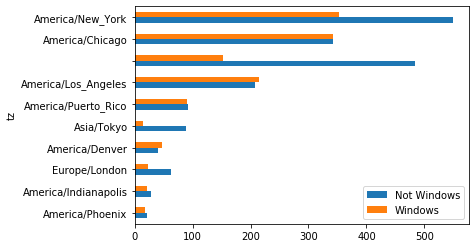

In [56]:
count_subset.plot(kind='barh', stacked=False)

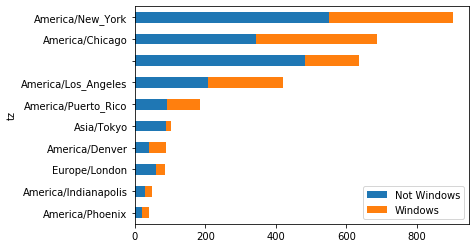

In [57]:
count_subset.plot(kind='barh', stacked=True)

In [58]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

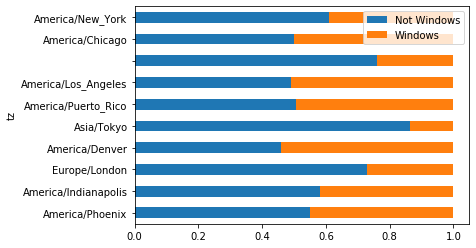

In [59]:
normed_subset.plot(kind='barh', stacked=True)